| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|

# ZDT3 problem 
## - (#variables / #objectives)
## - 10/2
## - 20/2

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`


In [9]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = get_performance_indicator("igd+", pf)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv','igd_plus',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['hv','igd_plus'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

In [10]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='ZDT3'].reset_index(drop=True)
zdt3_10= result.loc[result['n_variables']==10].reset_index(drop=True)
zdt3_20= result.loc[result['n_variables']==20].reset_index(drop=True)
print(f"The number of records {len(zdt3_10)}")
print(f"The number of records {len(zdt3_20)}")

The number of records 48
The number of records 48


# zdt3 with 10 variables

In [11]:
#path and image path indicating location of objective file and visualization file
zdt3_10.iloc[:,-2:].head(5)

,path,image_location
0,ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration-100_Ob...,Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2_Iterat...
1,ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration-200_Ob...,Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2_Iterat...
2,ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration-200_Ob...,Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2_Iterat...
3,ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration-100_Ob...,Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2_Iterat...
4,ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration-100_Ob...,Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2_Iterat...


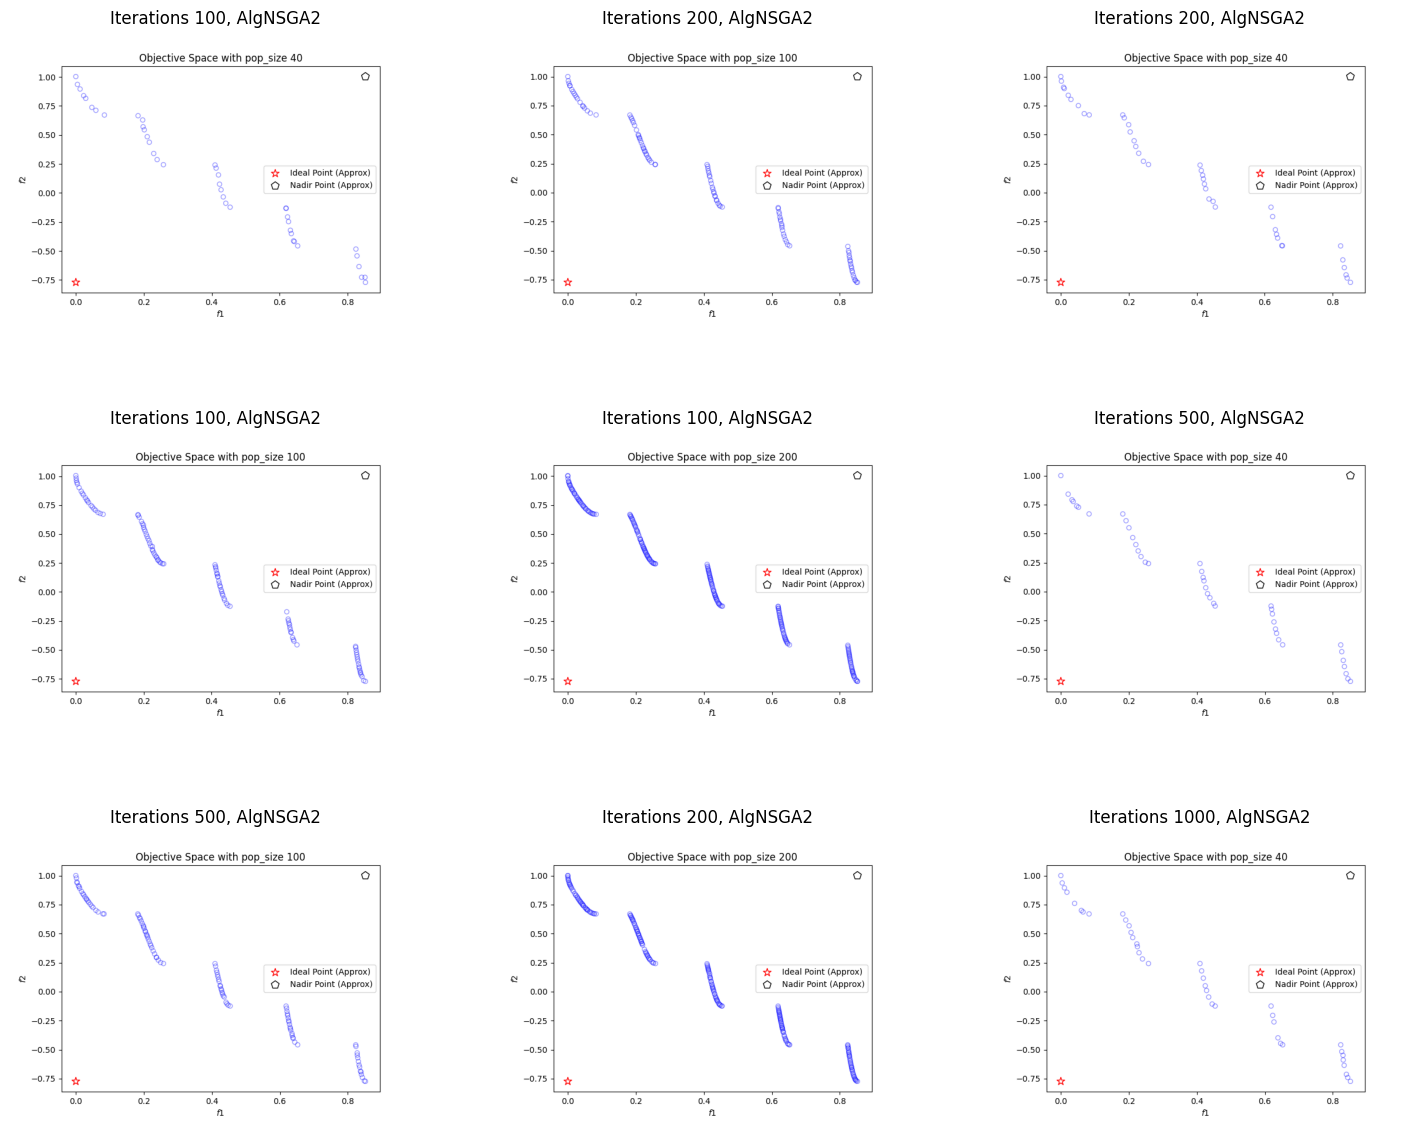

In [12]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt3_10['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt3_10.Iteration[i]}, Alg{zdt3_10.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [13]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(zdt3_10['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([0.8 ,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
hv_result(zdt3_10)

Global nadir point for kur1 with two variables is :[0.86 1.05]
ref_point is [0.8 1. ]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT3,NSGA2,200000,1000,2,10,200,19.4014778,0.6990185,0.0005365,0.0029879
1,ZDT3,NSGA2,100000,500,2,10,200,9.3460157,0.6989937,0.0005220,0.0034471
2,ZDT3,NSGA2,40000,200,2,10,200,3.5186090,0.6988593,0.0006104,0.0030198
3,ZDT3,NSGA2,20000,100,2,10,200,1.8124511,0.6986459,0.0006215,0.0038080
4,ZDT3,NSGA3,100000,500,2,10,200,10.7311921,0.6985809,0.0006535,0.0031912
5,ZDT3,NSGA3,200000,1000,2,10,200,22.4098947,0.6983802,0.0007034,0.0040650
6,ZDT3,NSGA3,40000,200,2,10,200,4.2551565,0.6982927,0.0007166,0.0036180
7,ZDT3,NSGA3,20000,100,2,10,200,1.9506302,0.6981535,0.0007159,0.0035801
8,ZDT3,AGNOMEN,20000,200,2,10,40,4.7094221,0.6980626,0.0018170,0.0017018
9,ZDT3,AGNOMEN,20000,200,2,10,100,4.7852690,0.6980626,0.0018170,0.0016358


In [14]:
ref_point = np.array([5 ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
hv_result(zdt3_10)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT3,NSGA2,200000,1000,2,10,200,19.4014778,28.1365566,0.0005365,0.0033460
1,ZDT3,NSGA2,100000,500,2,10,200,9.3460157,28.1365442,0.0005220,0.0030820
2,ZDT3,NSGA2,40000,200,2,10,200,3.5186090,28.1364140,0.0006104,0.0031359
3,ZDT3,NSGA2,20000,100,2,10,200,1.8124511,28.1354385,0.0006215,0.0032761
4,ZDT3,NSGA3,40000,200,2,10,200,4.2551565,28.1351029,0.0007166,0.0034530
5,ZDT3,AGNOMEN,100000,1000,2,10,100,29.6615117,28.1350079,0.0012063,0.0025749
6,ZDT3,AGNOMEN,100000,1000,2,10,40,31.1889911,28.1350079,0.0012063,0.0016150
7,ZDT3,AGNOMEN,100000,1000,2,10,200,28.9575610,28.1350079,0.0012063,0.0016372
8,ZDT3,NSGA2,100000,1000,2,10,100,9.7838407,28.1349626,0.0012066,0.0016260
9,ZDT3,NSGA2,50000,500,2,10,100,4.8171773,28.1348986,0.0012599,0.0018611


# zdt3 with 20 variables

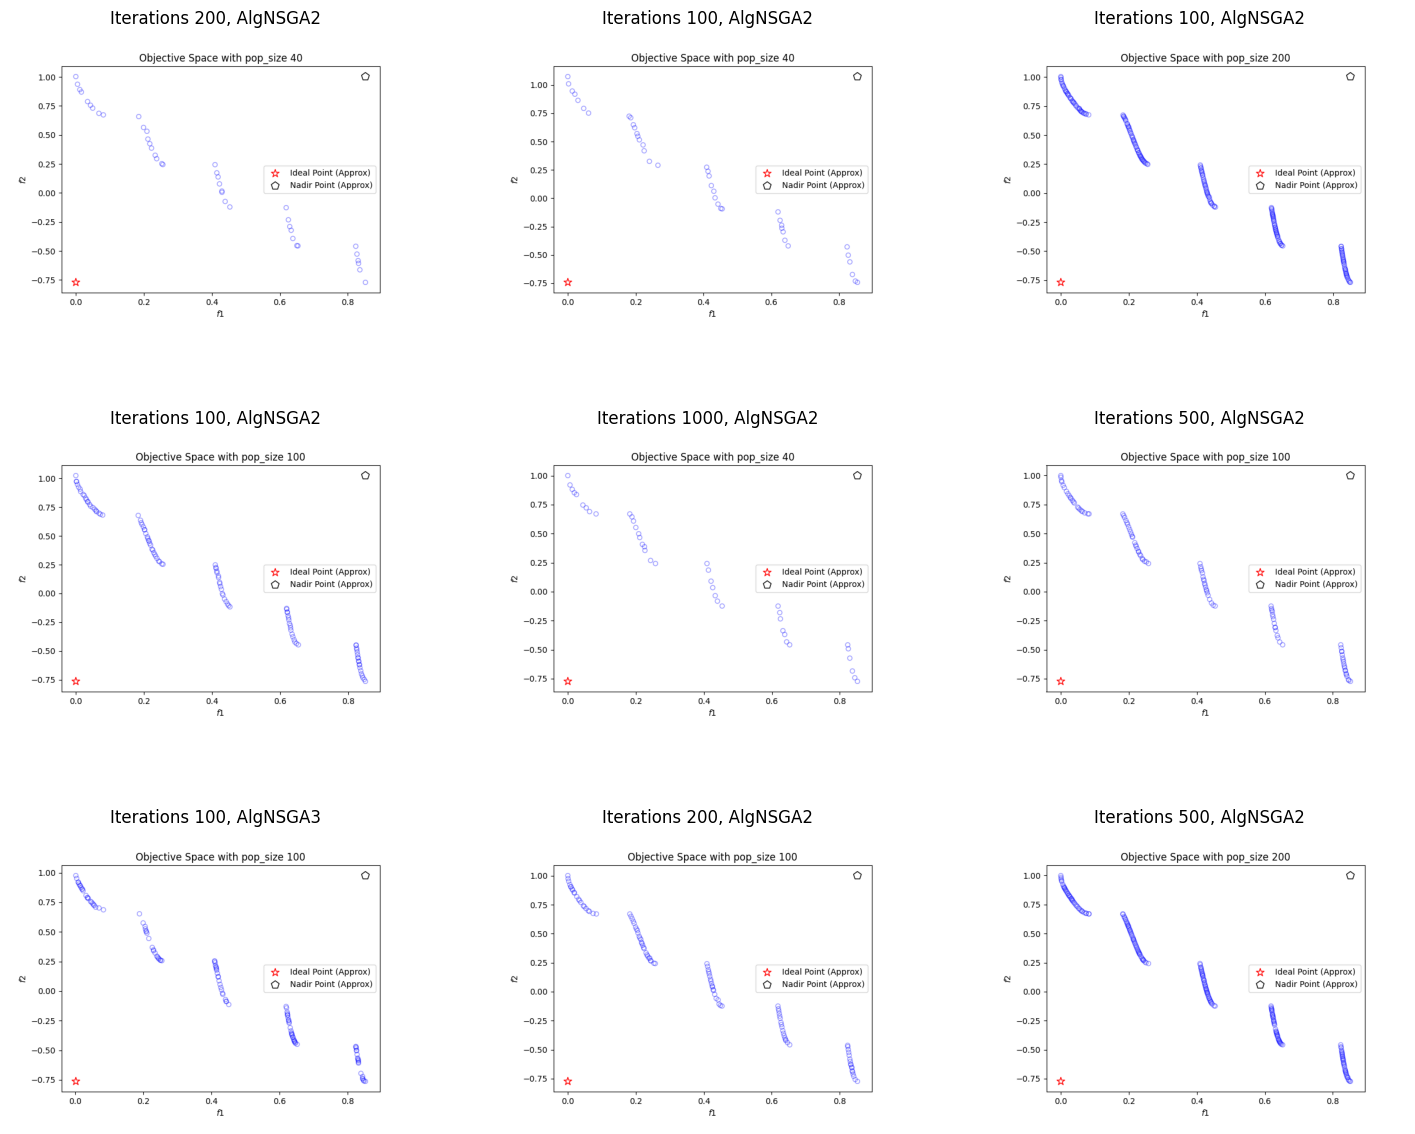

In [15]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt3_20['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt3_20.Iteration[i]}, Alg{zdt3_20.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [16]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(zdt3_20['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([0.9,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
hv_result(zdt3_20)

Global nadir point for kur1 with two variables is :[0.86 1.07]
ref_point is [0.9 1. ]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT3,NSGA2,100000,500,2,20,200,9.3205426,0.8656492,0.0006139,0.0038071
1,ZDT3,NSGA2,200000,1000,2,20,200,20.4003794,0.8655257,0.0006316,0.0030792
2,ZDT3,NSGA2,40000,200,2,20,200,3.8598058,0.8653679,0.0006367,0.0344830
3,ZDT3,NSGA3,200000,1000,2,20,200,22.4979811,0.8652194,0.0007334,0.0035391
4,ZDT3,NSGA3,100000,500,2,20,200,10.8083043,0.8649596,0.0006909,0.0043521
5,ZDT3,AGNOMEN,100000,1000,2,20,40,27.9690707,0.8641476,0.0012225,0.0017688
6,ZDT3,AGNOMEN,100000,1000,2,20,100,28.2088718,0.8641476,0.0012225,0.0018370
7,ZDT3,AGNOMEN,100000,1000,2,20,200,27.9961026,0.8641476,0.0012225,0.0018561
8,ZDT3,NSGA2,50000,500,2,20,100,4.8365991,0.8640957,0.0012641,0.0016623
9,ZDT3,AGNOMEN,50000,500,2,20,200,13.1974492,0.8640438,0.0012322,0.0017087


In [17]:
ref_point = np.array([5,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
hv_result(zdt3_20)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT3,NSGA2,100000,500,2,20,200,9.3205426,28.1364586,0.0006139,0.0039811
1,ZDT3,NSGA2,200000,1000,2,20,200,20.4003794,28.1363386,0.0006316,0.0028651
2,ZDT3,AGNOMEN,100000,1000,2,20,40,27.9690707,28.1349605,0.0012225,0.0018830
3,ZDT3,AGNOMEN,100000,1000,2,20,100,28.2088718,28.1349605,0.0012225,0.0016458
4,ZDT3,AGNOMEN,100000,1000,2,20,200,27.9961026,28.1349605,0.0012225,0.0015669
5,ZDT3,NSGA2,50000,500,2,20,100,4.8365991,28.1348902,0.0012641,0.0017779
6,ZDT3,NSGA2,40000,200,2,20,200,3.8598058,28.1348589,0.0006367,0.0029311
7,ZDT3,AGNOMEN,50000,500,2,20,200,13.1974492,28.1348566,0.0012322,0.0016849
8,ZDT3,AGNOMEN,50000,500,2,20,100,13.3975458,28.1348566,0.0012322,0.0022829
9,ZDT3,AGNOMEN,50000,500,2,20,40,13.4793622,28.1348566,0.0012322,0.0016351
